## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
##

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
"""
Your code here
"""
from sklearn.preprocessing import MinMaxScaler
# Scale each feature to 1-1
scaler = MinMaxScaler(feature_range = (-1, 1))


def preproc_x(x):
    x = x /255
    x = x.reshape(len(x), -1)
    x = scaler.fit_transform(x)
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
"""Code Here
建立你的神經網路
"""

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(x_train.shape[1:])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total par

In [15]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 256

In [16]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/10





50000/50000 [==============================] - 9s 182us/step - loss: 1.7219 - acc: 0.3896 - val_loss: 1.5932 - val_acc: 0.4350
Epoch 2/10
50000/50000 [==============================] - 8s 158us/step - loss: 1.4811 - acc: 0.4768 - val_loss: 1.4619 - val_acc: 0.4820
Epoch 3/10
50000/50000 [==============================] - 8s 152us/step - loss: 1.3592 - acc: 0.5185 - val_loss: 1.4269 - val_acc: 0.4950
Epoch 4/10
50000/50000 [==============================] - 8s 159us/step - loss: 1.2631 - acc: 0.5528 - val_loss: 1.3710 - val_acc: 0.5193
Epoch 5/10
50000/50000 [==============================] - 8s 153us/step - loss: 1.1777 - acc: 0.5841 - val_loss: 1.3784 - val_acc: 0.5201
Epoch 6/10
50000/50000 [==============================] - 8s 162us/step - loss: 1.1030 - acc: 0.6089 - val_loss: 1.4025 - val_acc: 0.5231
Epoch 7/10
50000/500

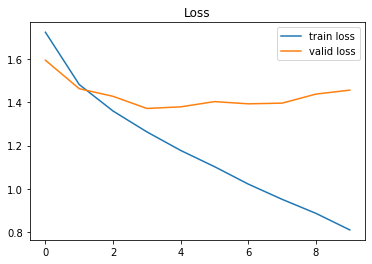

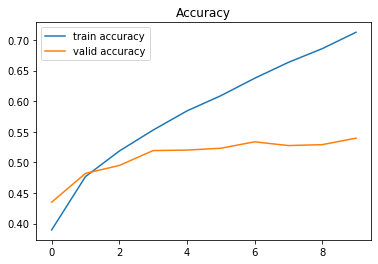

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()